In [ ]:
# imported libraies
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 2s 0us/step


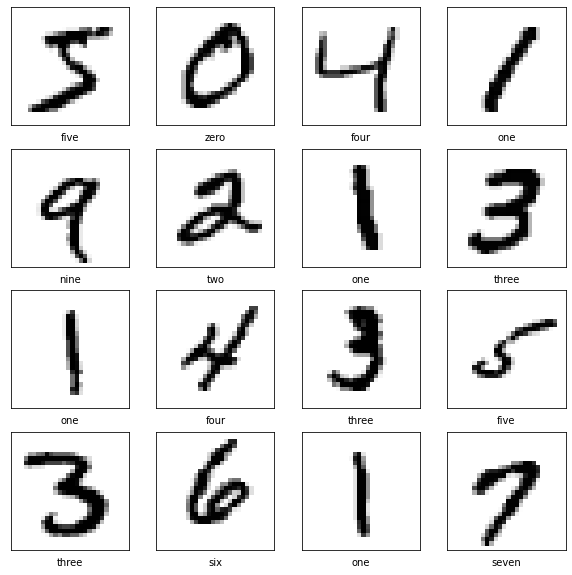

In [ ]:
# Download MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

class_names = ['zero', 'one', 'two', 'three', 'four', 'five','six', 'seven', 'eight', 'nine']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Preprocessing the data
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# Buidling CNN
model = models.Sequential()
# model.add(layers.Conv2D(25, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(25, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #3D to 2D
model.add(layers.Dense(100, activation='relu')) #dense layer (FCNN)
model.add(layers.Dense(10)) #output layer (FCNN)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 50)        11300     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1800)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [ ]:
# from_logits = False if you set the activation function as softmax in the last dense layer

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 19s 5ms/step - loss: 0.1395 - accuracy: 0.9577 - val_loss: 0.0627 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.0411 - val_accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0324 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0351 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0325 - val_accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0325 - val_accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.0372 - val_accuracy

313/313 - 2s - loss: 0.0372 - accuracy: 0.9914 - 2s/epoch - 7ms/step
0.9914000034332275


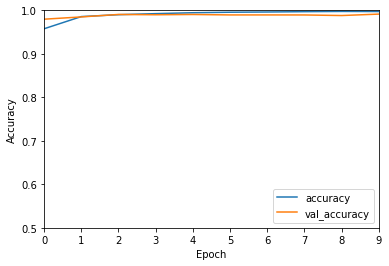

In [ ]:
# Evaluate the CNN Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 9])
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)